In [3]:
import pandas as pd
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key="f34674eebca4c04bf734ed1511c961e4")

# Define the series IDs for the FRB balance sheet components
# For example, "WALCL" is the series ID for Total Assets of the Federal Reserve
series_ids = {
    "Total Assets": "WALCL",
    "Reserve Balances with Federal Reserve Banks": "WRESBAL",
    "Treasury Securities": "TREAST",
    "Mortgage-Backed Securities": "MBST",
}

# Fetch the data
data = {name: fred.get_series(series_id) for name, series_id in series_ids.items()}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


            Total Assets  Reserve Balances with Federal Reserve Banks  \
1984-01-04           NaN                                       22.305   
1984-01-11           NaN                                       21.443   
1984-01-18           NaN                                       21.467   
1984-01-25           NaN                                       20.922   
1984-02-01           NaN                                       20.825   

            Treasury Securities  Mortgage-Backed Securities  
1984-01-04                  NaN                         NaN  
1984-01-11                  NaN                         NaN  
1984-01-18                  NaN                         NaN  
1984-01-25                  NaN                         NaN  
1984-02-01                  NaN                         NaN  


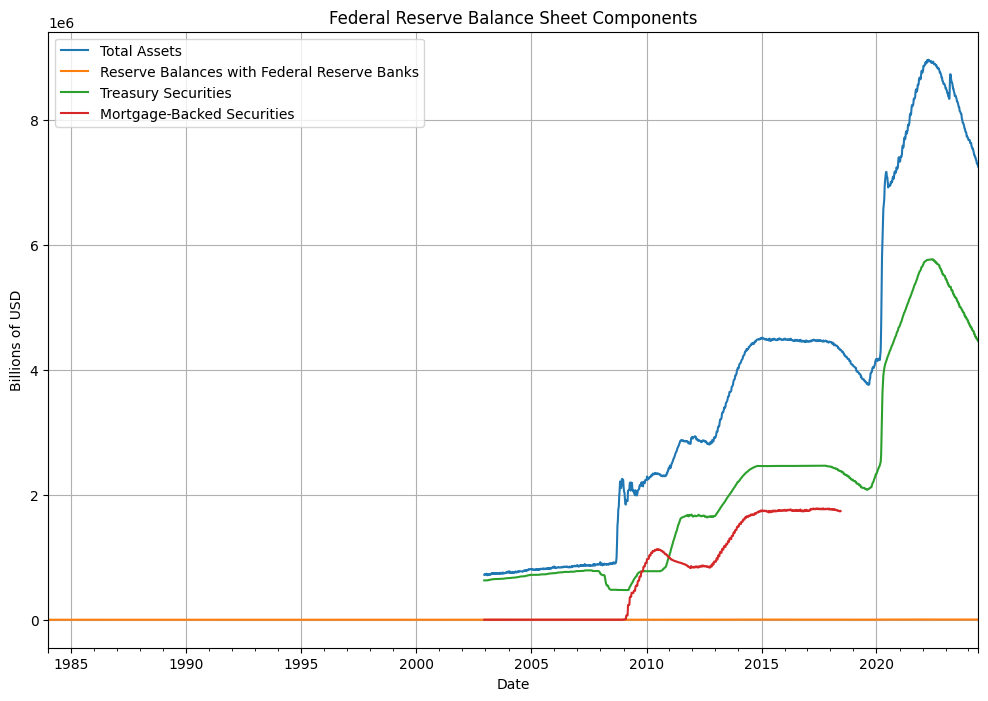

In [4]:
import matplotlib.pyplot as plt

# Plot the data
df.plot(figsize=(12, 8))
plt.title('Federal Reserve Balance Sheet Components')
plt.xlabel('Date')
plt.ylabel('Billions of USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


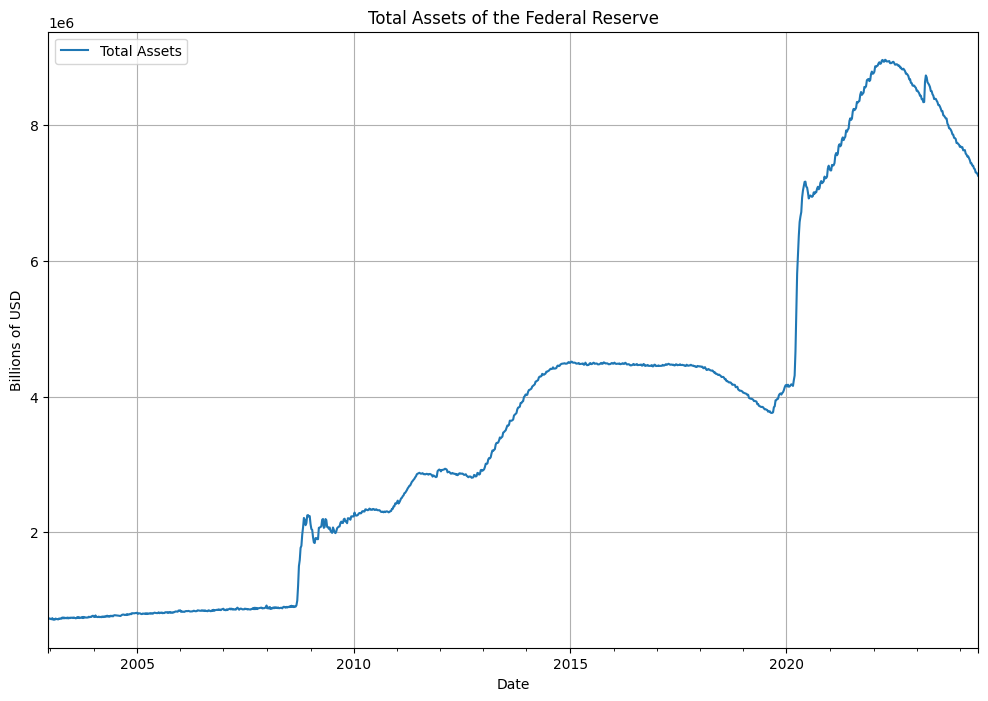

                               SARIMAX Results                                
Dep. Variable:           Total Assets   No. Observations:                 1121
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13314.131
Date:                Sat, 08 Jun 2024   AIC                          26640.263
Time:                        18:58:35   BIC                          26670.389
Sample:                    12-18-2002   HQIC                         26651.650
                         - 06-05-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4144      0.007     63.078      0.000       0.402       0.427
ar.L2          0.0330      0.013      2.624      0.009       0.008       0.058
ar.L3         -0.0311      0.014     -2.177      0.0

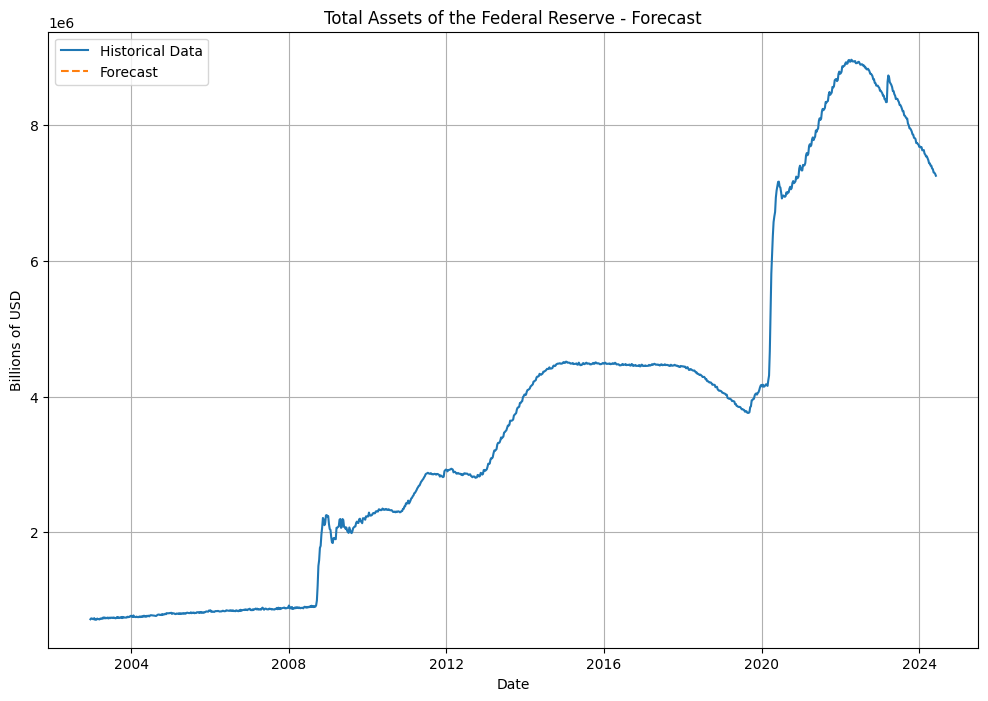

In [5]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key="f34674eebca4c04bf734ed1511c961e4")

# Fetch the Total Assets data
total_assets = fred.get_series('WALCL')

# Convert to DataFrame
df = pd.DataFrame(total_assets, columns=['Total Assets'])

# Plot the data
df.plot(figsize=(12, 8))
plt.title('Total Assets of the Federal Reserve')
plt.xlabel('Date')
plt.ylabel('Billions of USD')
plt.grid(True)
plt.show()

# Fit an ARIMA model
model = ARIMA(df['Total Assets'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future values
forecast = model_fit.forecast(steps=12)
forecast_df = pd.DataFrame(forecast, columns=['Forecast'])

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(df['Total Assets'], label='Historical Data')
plt.plot(forecast_df, label='Forecast', linestyle='--')
plt.title('Total Assets of the Federal Reserve - Forecast')
plt.xlabel('Date')
plt.ylabel('Billions of USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Mean Squared Error: 12702878114124.582


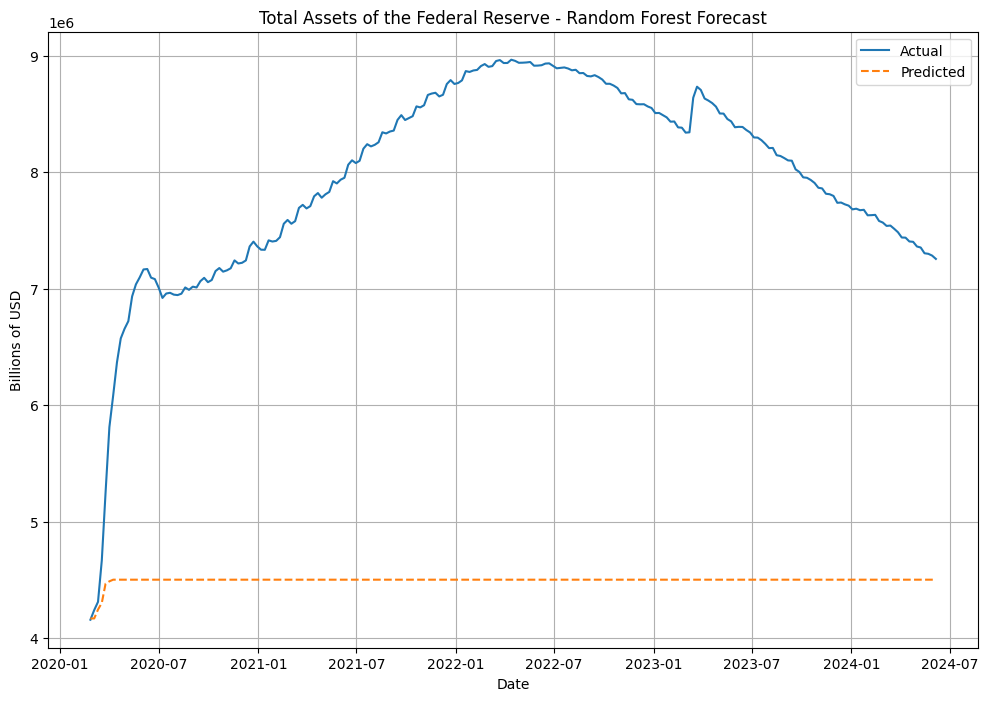

In [7]:
import pandas as pd
from fredapi import Fred
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key="f34674eebca4c04bf734ed1511c961e4")

# Fetch the Total Assets data
total_assets = fred.get_series('WALCL')

# Convert to DataFrame
df = pd.DataFrame(total_assets, columns=['Total Assets'])

# Create lagged features
df['Lag1'] = df['Total Assets'].shift(1)
df['Lag2'] = df['Total Assets'].shift(2)
df['Lag3'] = df['Total Assets'].shift(3)

# Drop rows with NaN values
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Lag1', 'Lag2', 'Lag3']]
y = df['Total Assets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted', linestyle='--')
plt.title('Total Assets of the Federal Reserve - Random Forest Forecast')
plt.xlabel('Date')
plt.ylabel('Billions of USD')
plt.legend()
plt.grid(True)
plt.show()


2024-06-08 19:13:43.434219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 19:13:45.648146: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 19:13:53.629861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[*********************100%%**********************]  1 of 1 completed


2024-06-08 19:14:01.719613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:14:01.721954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:14:01.724960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:14:02.937072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:14:02.940291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:14:02.942260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0052

2024-06-08 19:14:15.129314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:14:15.133195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:14:15.135694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 13s 93ms/step - loss: 0.0052 - val_loss: 8.5726e-04
Epoch 2/20
75/75 [==============================] - 6s 74ms/step - loss: 1.1475e-04 - val_loss: 7.2199e-04
Epoch 3/20
75/75 [==============================] - 6s 77ms/step - loss: 1.0707e-04 - val_loss: 6.6544e-04
Epoch 4/20
75/75 [==============================] - 5s 70ms/step - loss: 1.0565e-04 - val_loss: 6.5042e-04
Epoch 5/20
75/75 [==============================] - 5s 71ms/step - loss: 1.0413e-04 - val_loss: 5.8155e-04
Epoch 6/20
75/75 [==============================] - 5s 73ms/step - loss: 9.4287e-05 - val_loss: 5.3345e-04
Epoch 7/20
75/75 [==============================] - 5s 71ms/step - loss: 8.7974e-05 - val_loss: 5.3470e-04
Epoch 8/20
75/75 [==============================] - 5s 73ms/step - loss: 8.8339e-05 - val_loss: 4.7982e-04
Epoch 9/20
75/75 [==============================] - 5s 73ms/step - loss: 8.0152e-05 - val_loss: 4.6955e-04
Epoch 10/20
75/75 [==============================] 

2024-06-08 19:15:59.612985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:15:59.616250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:15:59.618955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 1s 19ms/step
Mean Squared Error: 1029.0714538774114


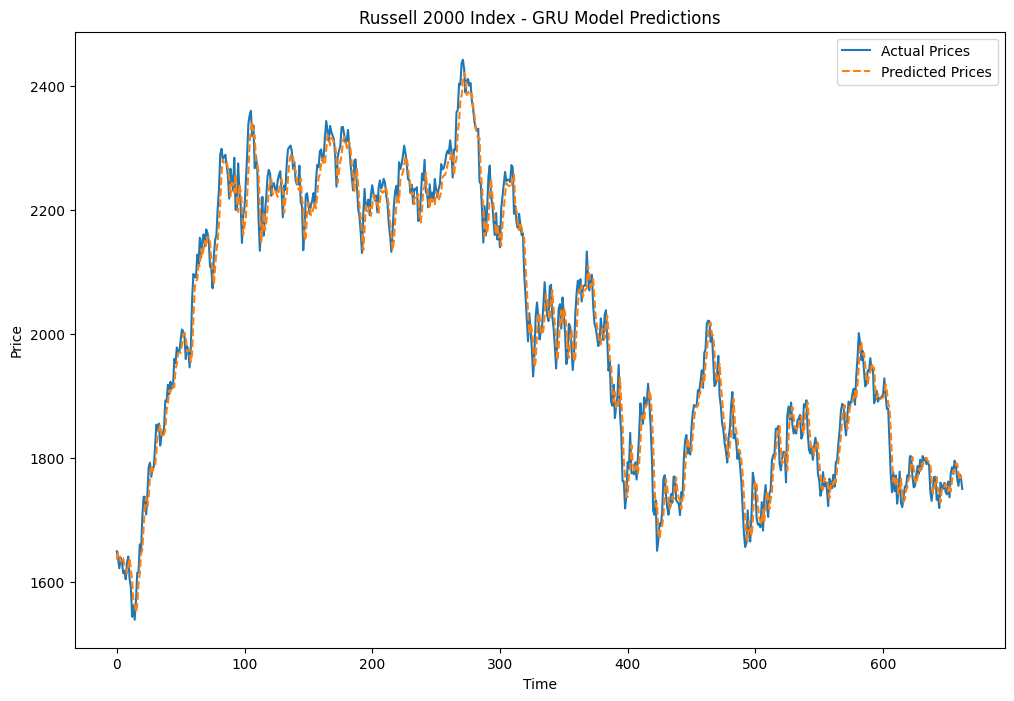

1/1 [==============================] - 0s 56ms/step
Next 5 days predictions: [[1758.2367]]


In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict the next 5 days
last_sequence = scaled_data[-seq_length:]
last_sequence = last_sequence.reshape((1, seq_length, 1))
next_5_days_scaled = model.predict(last_sequence)
next_5_days = scaler.inverse_transform(next_5_days_scaled)

print(f'Next 5 days predictions: {next_5_days}')


In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next 5 days
last_sequence = scaled_data[-seq_length:]
last_sequence = last_sequence.reshape((1, seq_length, 1))

# Make predictions for the next 5 days
next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = model.predict(last_sequence)
    next_5_days_predictions.append(next_day_prediction[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

# Inverse transform the predictions
next_5_days_predictions = scaler.inverse_transform(np.array(next_5_days_predictions).reshape(-1, 1))

print(f'Next 5 days predictions: {next_5_days_predictions.flatten()}')


[*********************100%%**********************]  1 of 1 completed


ValueError: not enough values to unpack (expected 4, got 2)

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


[*********************100%%**********************]  1 of 1 completed


ValueError: not enough values to unpack (expected 4, got 2)

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with LSTM
lstm_predicted_prices = lstm_model.predict(X_test)

# Inverse transform the LSTM predictions
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

# Evaluate the LSTM model
lstm_mse = mean_squared_error(actual_prices, lstm_predicted_prices)
print(f'LSTM Mean Squared Error: {lstm_mse}')

# Plot the results for LSTM
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(lstm_predicted_prices, label='LSTM Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with GRU
gru_predicted_prices = gru_model.predict(X_test)

# Inverse transform the GRU predictions
gru_predicted_prices = scaler.inverse_transform(gru_predicted_prices)

# Evaluate the GRU model
gru_mse = mean_squared_error(actual_prices, gru_predicted_prices)
print(f'GRU Mean Squared Error: {gru_mse}')

# Plot the results for GRU
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(gru_predicted_prices, label='GRU Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next 5 days using the LSTM model
lstm_last_sequence = scaled_data[-seq_length:]
lstm_last_sequence = lstm_last_sequence.reshape((1, seq_length, 1))

lstm_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = lstm_model.predict(lstm_last_sequence)
    lstm_next_5_days_predictions.append(next_day_prediction[0, 0])
    lstm_last_sequence = np.append(lstm_last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

lstm_next_5_days_predictions = scaler.inverse_transform(np.array(lstm_next_5_days_predictions).reshape(-1, 1))
print(f'LSTM Next 5 days predictions: {lstm_next_5_days_predictions.flatten()}')

# Predict the next 5 days using the GRU model
gru_last_sequence = scaled_data[-seq_length:]
gru_last_sequence = gru_last_sequence.reshape((1, seq_length, 1))

gru_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = gru_model.predict(gru_last_sequence)
    gru_next_5_days_predictions.append(next_day_prediction[0, 0])
    gru_last_sequence = np.append(gru_last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

gru_next_5_days_predictions = scaler.inverse_transform(np.array(gru_next_5_days_predictions).reshape(-1, 1))
print(f'GRU Next 5 days predictions: {gru_next_5_days_predictions.flatten()}')


[*********************100%%**********************]  1 of 1 completed


ValueError: not enough values to unpack (expected 4, got 2)

ValueError                                Traceback (most recent call last)
Cell In[13], line 37
     35 # Split the data into training and testing sets
     36 split = int(0.8 * len(X))
---> 37 X_train, X_test, y_train, y_test = X[:split], X[split:]
     38 y_train = y_train.reshape(-1, 1)
     39 y_test = y_test.reshape(-1, 1)

ValueError: not enough values to unpack (expected 4, got 2)

The error occurs because the X[:split] and X[split:] assignments return two arrays instead of the expected four. To fix this, ensure that both the feature and target arrays (X and y) are split correctly into training and testing sets.

Here's the corrected code:

[*********************100%%**********************]  1 of 1 completed


2024-06-08 19:21:40.887066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:21:40.889980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:21:40.892749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:21:41.263809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:21:41.267269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:21:41.270991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0073

2024-06-08 19:21:52.725835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:21:52.730284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:21:52.732833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 12s 91ms/step - loss: 0.0073 - val_loss: 0.0020
Epoch 2/20
75/75 [==============================] - 6s 73ms/step - loss: 2.5404e-04 - val_loss: 0.0019
Epoch 3/20
75/75 [==============================] - 5s 69ms/step - loss: 2.5240e-04 - val_loss: 0.0018
Epoch 4/20
75/75 [==============================] - 5s 70ms/step - loss: 2.3580e-04 - val_loss: 0.0017
Epoch 5/20
75/75 [==============================] - 5s 72ms/step - loss: 2.3698e-04 - val_loss: 0.0016
Epoch 6/20
75/75 [==============================] - 5s 72ms/step - loss: 2.2561e-04 - val_loss: 0.0016
Epoch 7/20
75/75 [==============================] - 5s 72ms/step - loss: 2.1981e-04 - val_loss: 0.0015
Epoch 8/20
75/75 [==============================] - 6s 74ms/step - loss: 2.1154e-04 - val_loss: 0.0014
Epoch 9/20
75/75 [==============================] - 5s 72ms/step - loss: 2.0285e-04 - val_loss: 0.0012
Epoch 10/20
75/75 [==============================] - 5s 72ms/step - loss: 2.0217e-04 - 

2024-06-08 19:23:37.104719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:23:37.107191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:23:37.108994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 1s 23ms/step
LSTM Mean Squared Error: 2410.392059623701


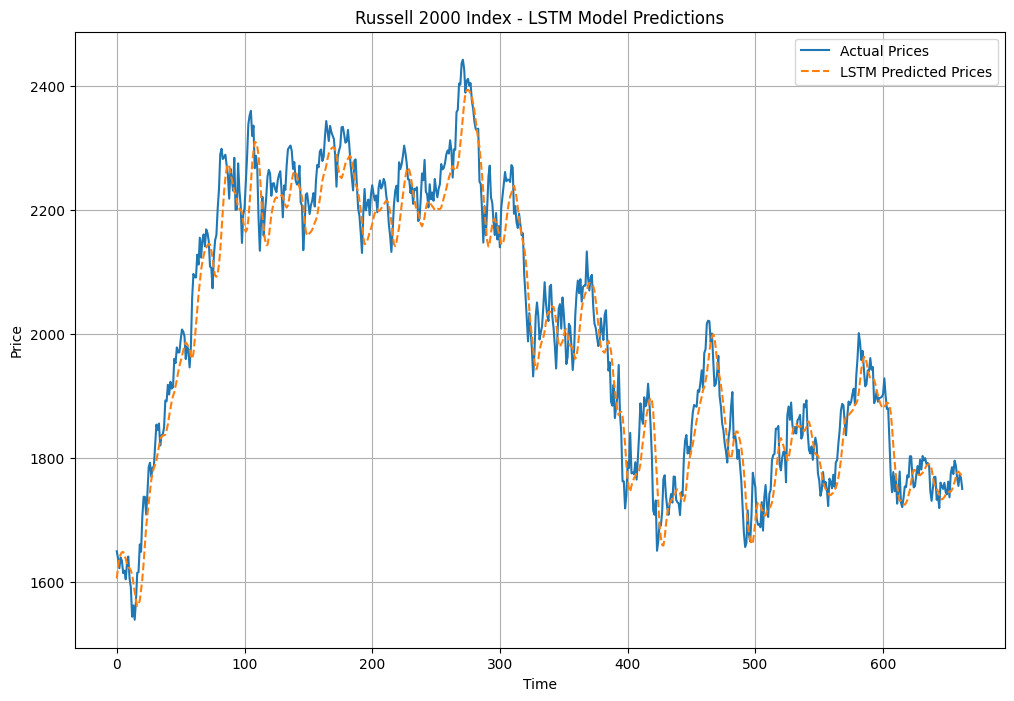

2024-06-08 19:23:38.864519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:23:38.866641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:23:38.868209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:23:39.133308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:23:39.136284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:23:39.138088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0072

2024-06-08 19:23:49.790080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:23:49.794052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:23:49.797024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 11s 81ms/step - loss: 0.0072 - val_loss: 8.3624e-04
Epoch 2/20
75/75 [==============================] - 5s 70ms/step - loss: 1.1721e-04 - val_loss: 7.2536e-04
Epoch 3/20
75/75 [==============================] - 5s 68ms/step - loss: 1.0767e-04 - val_loss: 6.6689e-04
Epoch 4/20
75/75 [==============================] - 5s 69ms/step - loss: 1.0167e-04 - val_loss: 6.3530e-04
Epoch 5/20
75/75 [==============================] - 5s 69ms/step - loss: 9.7194e-05 - val_loss: 6.0088e-04
Epoch 6/20
75/75 [==============================] - 5s 71ms/step - loss: 9.5851e-05 - val_loss: 5.6274e-04
Epoch 7/20
75/75 [==============================] - 5s 69ms/step - loss: 9.0550e-05 - val_loss: 5.1406e-04
Epoch 8/20
75/75 [==============================] - 5s 69ms/step - loss: 8.5690e-05 - val_loss: 4.8869e-04
Epoch 9/20
75/75 [==============================] - 5s 69ms/step - loss: 8.7236e-05 - val_loss: 4.6478e-04
Epoch 10/20
75/75 [==============================] 

2024-06-08 19:25:30.280745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:25:30.283664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:25:30.286238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 1s 25ms/step
GRU Mean Squared Error: 1101.378559648249


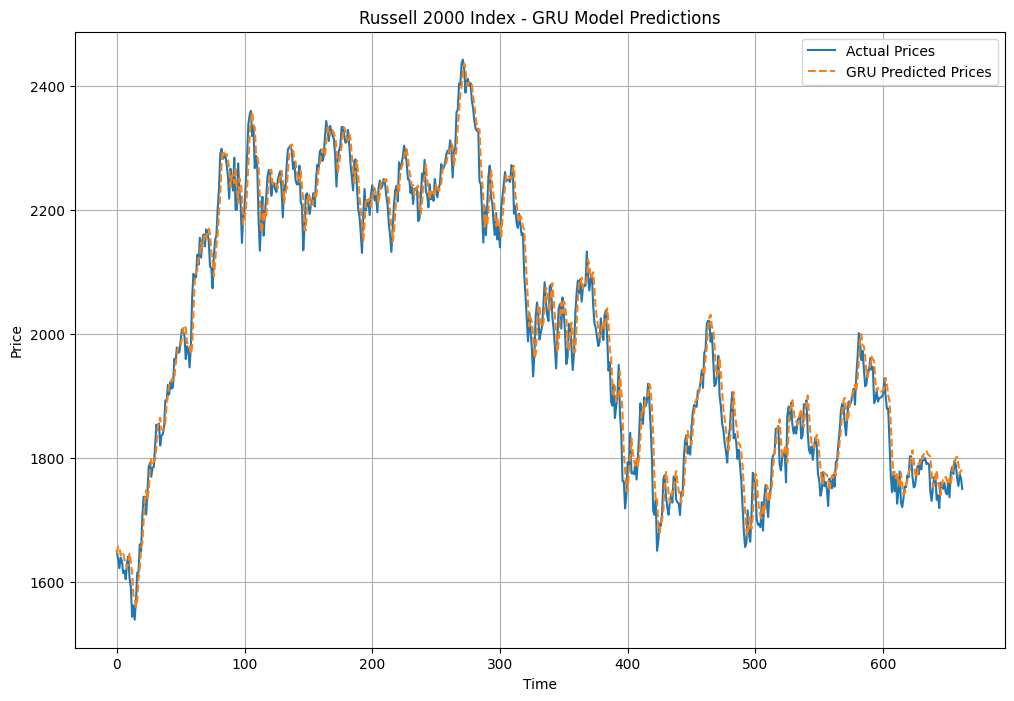

1/1 [==============================] - 0s 48ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with LSTM
lstm_predicted_prices = lstm_model.predict(X_test)

# Inverse transform the LSTM predictions
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the LSTM model
lstm_mse = mean_squared_error(actual_prices, lstm_predicted_prices)
print(f'LSTM Mean Squared Error: {lstm_mse}')

# Plot the results for LSTM
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(lstm_predicted_prices, label='LSTM Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with GRU
gru_predicted_prices = gru_model.predict(X_test)

# Inverse transform the GRU predictions
gru_predicted_prices = scaler.inverse_transform(gru_predicted_prices.reshape(-1, 1))

# Evaluate the GRU model
gru_mse = mean_squared_error(actual_prices, gru_predicted_prices)
print(f'GRU Mean Squared Error: {gru_mse}')

# Plot the results for GRU
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(gru_predicted_prices, label='GRU Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next 5 days using the LSTM model
lstm_last_sequence = scaled_data[-seq_length:]
lstm_last_sequence = lstm_last_sequence.reshape((1, seq_length, 1))

lstm_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = lstm_model.predict(lstm_last_sequence)
    lstm_next_5_days_predictions.append(next_day_prediction[0, 0])
    lstm_last_sequence = np.append(lstm_last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

lstm_next_5_days_predictions = scaler.inverse_transform(np.array(lstm_next_5_days_predictions).reshape(-1, 1))
print(f'LSTM Next 5 days predictions: {lstm_next_5_days_predictions.flatten()}')

# Predict the next 5 days using the GRU model
gru_last_sequence = scaled_data[-seq_length:]
gru_last_sequence = gru_last_sequence.reshape((1, seq_length, 1))

gru_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = gru_model.predict(gru_last_sequence)
    gru_next_5_days_predictions.append(next_day_prediction[0, 0])
    gru_last_sequence = np.append(gru_last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

gru_next_5_days_predictions = scaler.inverse_transform(np.array(gru_next_5_days_predictions).reshape(-1, 1))
print(f'GRU Next 5 days predictions: {gru_next_5_days_predictions.flatten()}')


The error occurs because the dimensions of the arrays being concatenated do not match. Specifically, lstm_last_sequence[:, 1:, :] has 3 dimensions, while [[next_day_prediction]] has 4 dimensions. We need to ensure that the dimensions match when appending the new prediction.

Here's the corrected code:

[*********************100%%**********************]  1 of 1 completed


2024-06-08 19:51:27.962121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:51:27.964519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:51:27.968119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:51:28.476080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:51:28.478524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:51:28.481016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0069

2024-06-08 19:51:41.215884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:51:41.219212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:51:41.223258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 14s 100ms/step - loss: 0.0069 - val_loss: 0.0020
Epoch 2/20
75/75 [==============================] - 6s 84ms/step - loss: 2.5734e-04 - val_loss: 0.0020
Epoch 3/20
75/75 [==============================] - 6s 84ms/step - loss: 2.4937e-04 - val_loss: 0.0019
Epoch 4/20
75/75 [==============================] - 6s 87ms/step - loss: 2.4231e-04 - val_loss: 0.0018
Epoch 5/20
75/75 [==============================] - 6s 82ms/step - loss: 2.3100e-04 - val_loss: 0.0017
Epoch 6/20
75/75 [==============================] - 6s 77ms/step - loss: 2.2905e-04 - val_loss: 0.0016
Epoch 7/20
75/75 [==============================] - 6s 81ms/step - loss: 2.2302e-04 - val_loss: 0.0016
Epoch 8/20
75/75 [==============================] - 6s 78ms/step - loss: 2.1447e-04 - val_loss: 0.0016
Epoch 9/20
75/75 [==============================] - 6s 80ms/step - loss: 2.0533e-04 - val_loss: 0.0014
Epoch 10/20
75/75 [==============================] - 6s 80ms/step - loss: 2.0099e-04 -

2024-06-08 19:53:38.407650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:53:38.410461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:53:38.412770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 26ms/step
LSTM Mean Squared Error: 3986.7859857046406


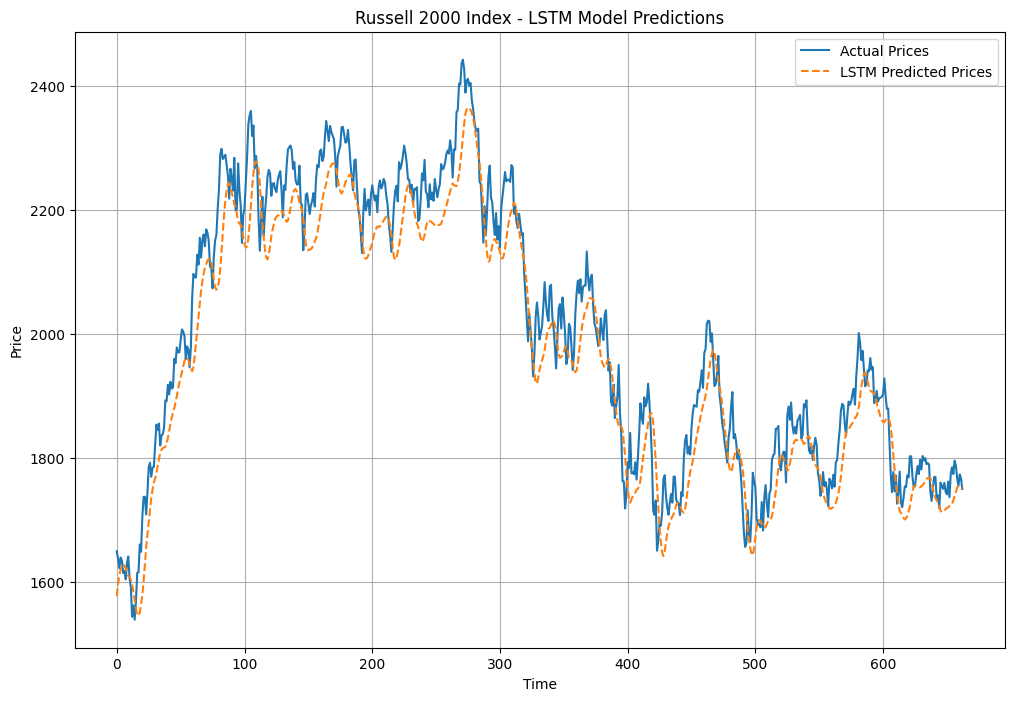

2024-06-08 19:53:41.158160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:53:41.161449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:53:41.163659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:53:41.473652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:53:41.475774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:53:41.479115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0062

2024-06-08 19:53:52.879337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:53:52.882382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:53:52.884688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 12s 89ms/step - loss: 0.0062 - val_loss: 8.0798e-04
Epoch 2/20
75/75 [==============================] - 6s 78ms/step - loss: 1.1250e-04 - val_loss: 6.7530e-04
Epoch 3/20
75/75 [==============================] - 6s 76ms/step - loss: 1.0266e-04 - val_loss: 6.2300e-04
Epoch 4/20
75/75 [==============================] - 6s 75ms/step - loss: 9.6349e-05 - val_loss: 5.8464e-04
Epoch 5/20
75/75 [==============================] - 6s 75ms/step - loss: 9.6281e-05 - val_loss: 5.4556e-04
Epoch 6/20
75/75 [==============================] - 6s 75ms/step - loss: 8.5645e-05 - val_loss: 5.1879e-04
Epoch 7/20
75/75 [==============================] - 6s 76ms/step - loss: 8.3529e-05 - val_loss: 4.7879e-04
Epoch 8/20
75/75 [==============================] - 6s 74ms/step - loss: 8.0073e-05 - val_loss: 4.6451e-04
Epoch 9/20
75/75 [==============================] - 6s 74ms/step - loss: 7.7271e-05 - val_loss: 4.3523e-04
Epoch 10/20
75/75 [==============================] 

2024-06-08 19:55:43.884608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:55:43.889040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:55:43.892152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 26ms/step
GRU Mean Squared Error: 1147.0012423241028


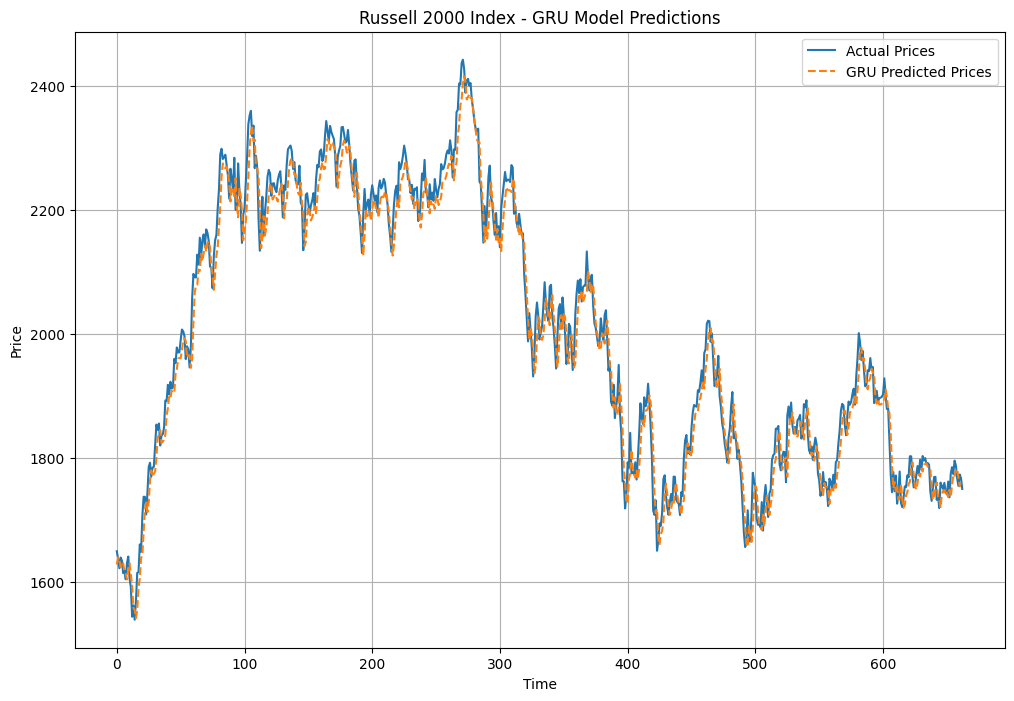

1/1 [==============================] - 0s 49ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with LSTM
lstm_predicted_prices = lstm_model.predict(X_test)

# Inverse transform the LSTM predictions
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the LSTM model
lstm_mse = mean_squared_error(actual_prices, lstm_predicted_prices)
print(f'LSTM Mean Squared Error: {lstm_mse}')

# Plot the results for LSTM
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(lstm_predicted_prices, label='LSTM Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with GRU
gru_predicted_prices = gru_model.predict(X_test)

# Inverse transform the GRU predictions
gru_predicted_prices = scaler.inverse_transform(gru_predicted_prices.reshape(-1, 1))

# Evaluate the GRU model
gru_mse = mean_squared_error(actual_prices, gru_predicted_prices)
print(f'GRU Mean Squared Error: {gru_mse}')

# Plot the results for GRU
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(gru_predicted_prices, label='GRU Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next 5 days using the LSTM model
lstm_last_sequence = scaled_data[-seq_length:]
lstm_last_sequence = lstm_last_sequence.reshape((1, seq_length, 1))

lstm_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = lstm_model.predict(lstm_last_sequence)
    lstm_next_5_days_predictions.append(next_day_prediction[0, 0])
    lstm_last_sequence = np.append(lstm_last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

lstm_next_5_days_predictions = scaler.inverse_transform(np.array(lstm_next_5_days_predictions).reshape(-1, 1))
print(f'LSTM Next 5 days predictions: {lstm_next_5_days_predictions.flatten()}')

# Predict the next 5 days using the GRU model
gru_last_sequence = scaled_data[-seq_length:]
gru_last_sequence = gru_last_sequence.reshape((1, seq_length, 1))

gru_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = gru_model.predict(gru_last_sequence)
    gru_next_5_days_predictions.append(next_day_prediction[0, 0])
    gru_last_sequence = np.append(gru_last_sequence[:, 1:, :], np.expand_dims(next_day_prediction, axis=0), axis=1)

gru_next_5_days_predictions = scaler.inverse_transform(np.array(gru_next_5_days_predictions).reshape(-1, 1))
print(f'GRU Next 5 days predictions: {gru_next_5_days_predictions.flatten()}')


[*********************100%%**********************]  1 of 1 completed


2024-06-08 19:57:17.662083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:57:17.665997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:57:17.668780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:57:18.005697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:57:18.008254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:57:18.012420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0064

2024-06-08 19:57:30.908064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:57:30.911265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:57:30.914142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 14s 104ms/step - loss: 0.0064 - val_loss: 0.0024
Epoch 2/20
75/75 [==============================] - 7s 88ms/step - loss: 2.8900e-04 - val_loss: 0.0022
Epoch 3/20
75/75 [==============================] - 7s 88ms/step - loss: 2.7163e-04 - val_loss: 0.0021
Epoch 4/20
75/75 [==============================] - 7s 90ms/step - loss: 2.7352e-04 - val_loss: 0.0020
Epoch 5/20
75/75 [==============================] - 7s 90ms/step - loss: 2.5153e-04 - val_loss: 0.0020
Epoch 6/20
75/75 [==============================] - 7s 96ms/step - loss: 2.6820e-04 - val_loss: 0.0018
Epoch 7/20
75/75 [==============================] - 7s 91ms/step - loss: 2.5500e-04 - val_loss: 0.0017
Epoch 8/20
75/75 [==============================] - 7s 90ms/step - loss: 2.5262e-04 - val_loss: 0.0017
Epoch 9/20
75/75 [==============================] - 6s 81ms/step - loss: 2.2000e-04 - val_loss: 0.0015
Epoch 10/20
75/75 [==============================] - 6s 81ms/step - loss: 2.1924e-04 -

2024-06-08 19:59:34.434546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:59:34.436858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:59:34.438965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 28ms/step
LSTM Mean Squared Error: 3100.797504509309


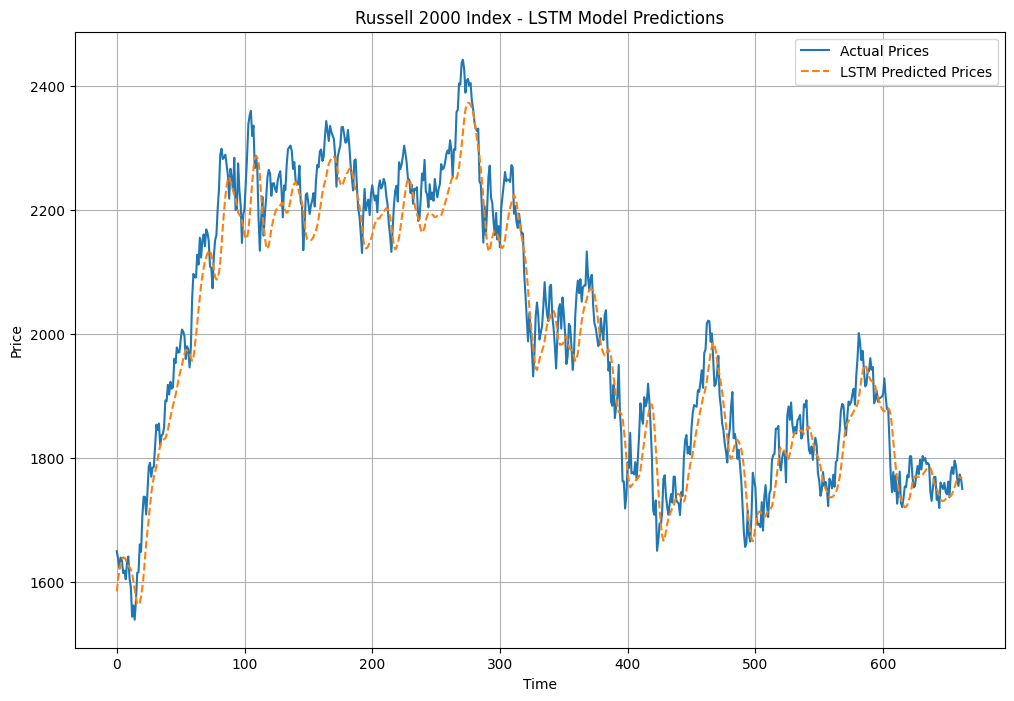

2024-06-08 19:59:36.456329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:59:36.458159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:59:36.459806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 19:59:36.929375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:59:36.932292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:59:36.934412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0063

2024-06-08 19:59:49.702555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 19:59:49.706298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 19:59:49.708204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 13s 97ms/step - loss: 0.0063 - val_loss: 8.0883e-04
Epoch 2/20
75/75 [==============================] - 7s 91ms/step - loss: 1.0876e-04 - val_loss: 6.6155e-04
Epoch 3/20
75/75 [==============================] - 7s 95ms/step - loss: 1.0372e-04 - val_loss: 6.0909e-04
Epoch 4/20
75/75 [==============================] - 7s 91ms/step - loss: 9.3750e-05 - val_loss: 5.6606e-04
Epoch 5/20
75/75 [==============================] - 7s 94ms/step - loss: 8.8406e-05 - val_loss: 5.2976e-04
Epoch 6/20
75/75 [==============================] - 7s 93ms/step - loss: 8.6749e-05 - val_loss: 5.0076e-04
Epoch 7/20
75/75 [==============================] - 6s 82ms/step - loss: 8.4050e-05 - val_loss: 4.6875e-04
Epoch 8/20
75/75 [==============================] - 6s 81ms/step - loss: 7.9593e-05 - val_loss: 4.5759e-04
Epoch 9/20
75/75 [==============================] - 6s 80ms/step - loss: 7.6069e-05 - val_loss: 4.3044e-04
Epoch 10/20
75/75 [==============================] 

2024-06-08 20:01:55.251998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:01:55.255274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:01:55.257451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 35ms/step
GRU Mean Squared Error: 1011.2216546484698


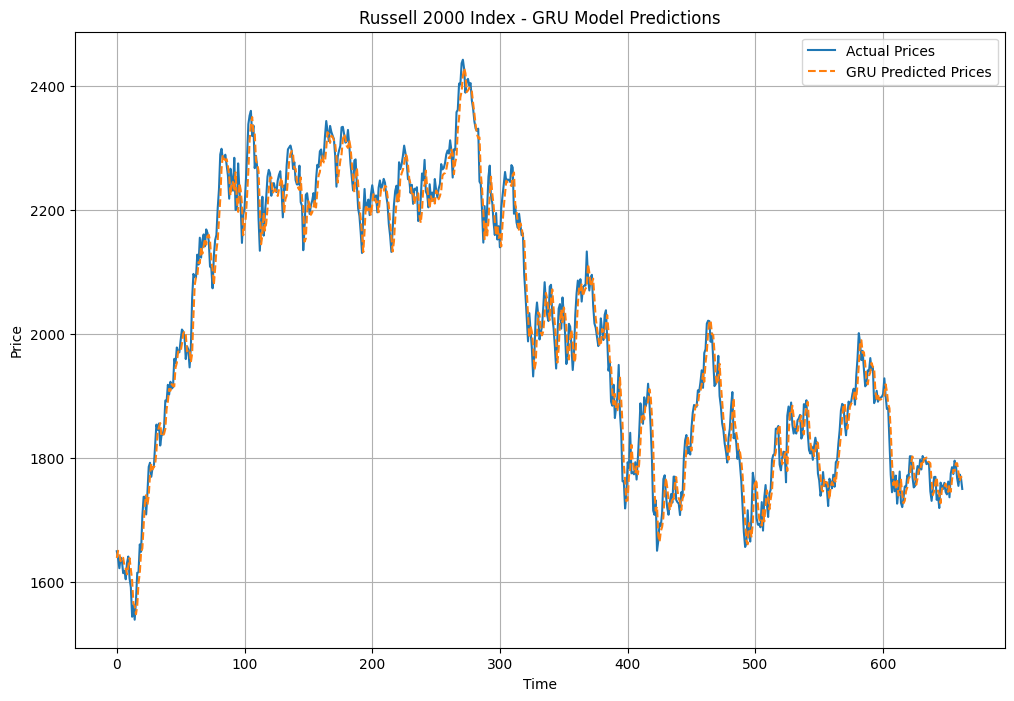

1/1 [==============================] - 0s 41ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with LSTM
lstm_predicted_prices = lstm_model.predict(X_test)

# Inverse transform the LSTM predictions
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the LSTM model
lstm_mse = mean_squared_error(actual_prices, lstm_predicted_prices)
print(f'LSTM Mean Squared Error: {lstm_mse}')

# Plot the results for LSTM
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(lstm_predicted_prices, label='LSTM Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with GRU
gru_predicted_prices = gru_model.predict(X_test)

# Inverse transform the GRU predictions
gru_predicted_prices = scaler.inverse_transform(gru_predicted_prices.reshape(-1, 1))

# Evaluate the GRU model
gru_mse = mean_squared_error(actual_prices, gru_predicted_prices)
print(f'GRU Mean Squared Error: {gru_mse}')

# Plot the results for GRU
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(gru_predicted_prices, label='GRU Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next 5 days using the LSTM model
lstm_last_sequence = scaled_data[-seq_length:]
lstm_last_sequence = lstm_last_sequence.reshape((1, seq_length, 1))

lstm_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = lstm_model.predict(lstm_last_sequence)
    lstm_next_5_days_predictions.append(next_day_prediction[0, 0])
    lstm_last_sequence = np.append(lstm_last_sequence[:, 1:, :], [[next_day_prediction]], axis=1)

lstm_next_5_days_predictions = scaler.inverse_transform(np.array(lstm_next_5_days_predictions).reshape(-1, 1))
print(f'LSTM Next 5 days predictions: {lstm_next_5_days_predictions.flatten()}')

# Predict the next 5 days using the GRU model
gru_last_sequence = scaled_data[-seq_length:]
gru_last_sequence = gru_last_sequence.reshape((1, seq_length, 1))

gru_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = gru_model.predict(gru_last_sequence)
    gru_next_5_days_predictions.append(next_day_prediction[0, 0])
    gru_last_sequence = np.append(gru_last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

gru_next_5_days_predictions = scaler.inverse_transform(np.array(gru_next_5_days_predictions).reshape(-1, 1))
print(f'GRU Next 5 days predictions: {gru_next_5_days_predictions.flatten()}')


2024-06-08 20:08:07.239181: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 20:08:12.314242: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 20:08:37.112978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[*********************100%%**********************]  1 of 1 completed


2024-06-08 20:08:59.405197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:08:59.409941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:08:59.412118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 20:09:00.524910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:09:00.528411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:09:00.531688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0058

2024-06-08 20:09:12.403182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:09:12.405774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:09:12.407597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 13s 99ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 2/20
75/75 [==============================] - 5s 70ms/step - loss: 2.5346e-04 - val_loss: 0.0020
Epoch 3/20
75/75 [==============================] - 5s 73ms/step - loss: 2.5040e-04 - val_loss: 0.0019
Epoch 4/20
75/75 [==============================] - 6s 78ms/step - loss: 2.6715e-04 - val_loss: 0.0020
Epoch 5/20
75/75 [==============================] - 6s 73ms/step - loss: 2.3879e-04 - val_loss: 0.0017
Epoch 6/20
75/75 [==============================] - 5s 72ms/step - loss: 2.2336e-04 - val_loss: 0.0017
Epoch 7/20
75/75 [==============================] - 6s 74ms/step - loss: 2.1157e-04 - val_loss: 0.0015
Epoch 8/20
75/75 [==============================] - 5s 73ms/step - loss: 2.0837e-04 - val_loss: 0.0014
Epoch 9/20
75/75 [==============================] - 5s 73ms/step - loss: 2.2077e-04 - val_loss: 0.0014
Epoch 10/20
75/75 [==============================] - 6s 74ms/step - loss: 1.9958e-04 - 

2024-06-08 20:11:00.089465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:11:00.093867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:11:00.096711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 23ms/step
LSTM Mean Squared Error: 2660.118056514347


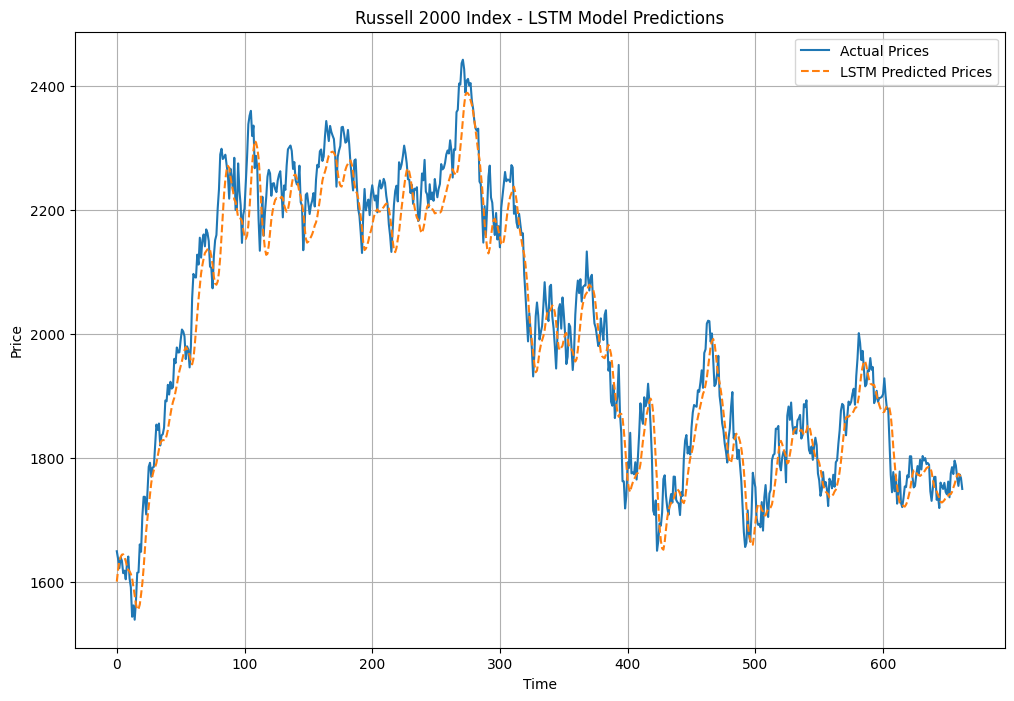

2024-06-08 20:11:02.189588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:11:02.193844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:11:02.196606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2024-06-08 20:11:02.489561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:11:02.492433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:11:02.495526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - ETA: 0s - loss: 0.0102

2024-06-08 20:11:13.838165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:11:13.842558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:11:13.844924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

75/75 [==============================] - 12s 89ms/step - loss: 0.0102 - val_loss: 7.9456e-04
Epoch 2/20
75/75 [==============================] - 6s 77ms/step - loss: 1.2168e-04 - val_loss: 7.0926e-04
Epoch 3/20
75/75 [==============================] - 5s 72ms/step - loss: 1.0928e-04 - val_loss: 6.5374e-04
Epoch 4/20
75/75 [==============================] - 5s 72ms/step - loss: 1.0301e-04 - val_loss: 6.2159e-04
Epoch 5/20
75/75 [==============================] - 6s 77ms/step - loss: 9.8469e-05 - val_loss: 5.8306e-04
Epoch 6/20
75/75 [==============================] - 6s 79ms/step - loss: 9.2294e-05 - val_loss: 5.3693e-04
Epoch 7/20
75/75 [==============================] - 6s 77ms/step - loss: 8.5853e-05 - val_loss: 5.0442e-04
Epoch 8/20
75/75 [==============================] - 6s 77ms/step - loss: 8.6931e-05 - val_loss: 5.0228e-04
Epoch 9/20
75/75 [==============================] - 6s 74ms/step - loss: 8.8040e-05 - val_loss: 4.6243e-04
Epoch 10/20
75/75 [==============================] 

2024-06-08 20:13:01.242319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-08 20:13:01.244530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-08 20:13:01.246148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 20ms/step
GRU Mean Squared Error: 1144.895294507794


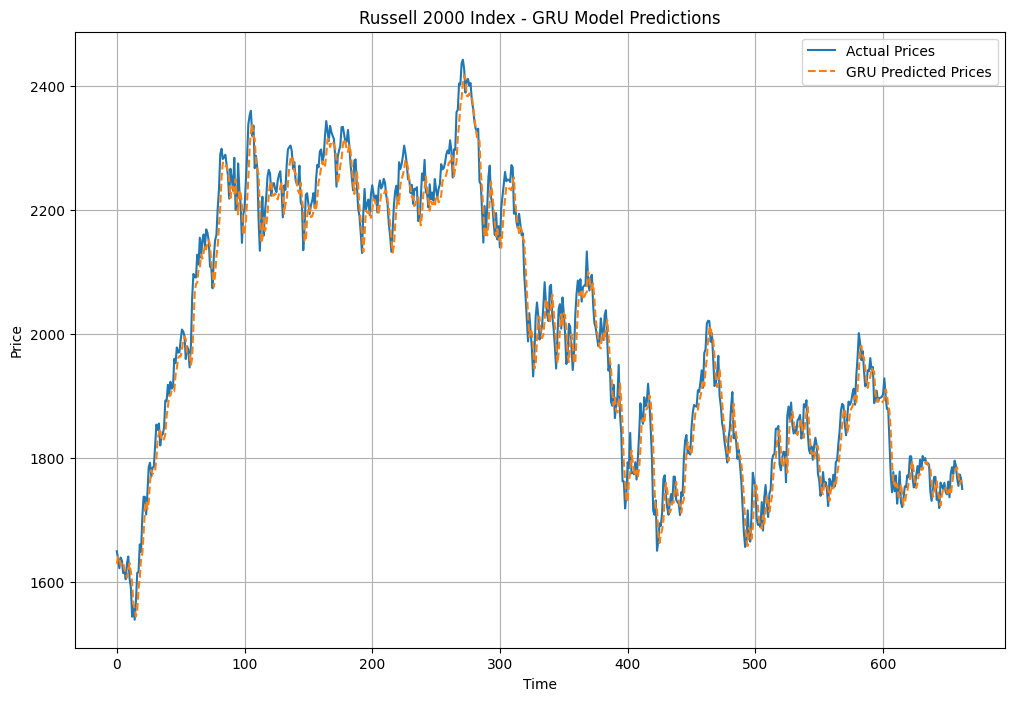

1/1 [==============================] - 0s 39ms/step
LSTM Next 5 days predictions: [1760.9545 1756.318  1751.9966 1747.8392 1743.7772]
1/1 [==============================] - 0s 39ms/step
GRU Next 5 days predictions: [1752.7947 1748.7776 1745.7349 1742.7716 1739.8381]


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.metrics import mean_squared_error

# Fetch historical data for Russell 2000 index
data = yf.download('^RUT', start='2010-01-01', end='2023-06-01')

# Use only the 'Close' price
data = data[['Close']]

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with LSTM
lstm_predicted_prices = lstm_model.predict(X_test)

# Inverse transform the LSTM predictions
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the LSTM model
lstm_mse = mean_squared_error(actual_prices, lstm_predicted_prices)
print(f'LSTM Mean Squared Error: {lstm_mse}')

# Plot the results for LSTM
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(lstm_predicted_prices, label='LSTM Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions with GRU
gru_predicted_prices = gru_model.predict(X_test)

# Inverse transform the GRU predictions
gru_predicted_prices = scaler.inverse_transform(gru_predicted_prices)

# Evaluate the GRU model
gru_mse = mean_squared_error(actual_prices, gru_predicted_prices)
print(f'GRU Mean Squared Error: {gru_mse}')

# Plot the results for GRU
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(gru_predicted_prices, label='GRU Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next 5 days using the LSTM model
lstm_last_sequence = scaled_data[-seq_length:]
lstm_last_sequence = lstm_last_sequence.reshape((1, seq_length, 1))

lstm_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = lstm_model.predict(lstm_last_sequence)
    lstm_next_5_days_predictions.append(next_day_prediction[0, 0])
    lstm_last_sequence = np.append(lstm_last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

lstm_next_5_days_predictions = scaler.inverse_transform(np.array(lstm_next_5_days_predictions).reshape(-1, 1))
print(f'LSTM Next 5 days predictions: {lstm_next_5_days_predictions.flatten()}')

# Predict the next 5 days using the GRU model
gru_last_sequence = scaled_data[-seq_length:]
gru_last_sequence = gru_last_sequence.reshape((1, seq_length, 1))

gru_next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = gru_model.predict(gru_last_sequence)
    gru_next_5_days_predictions.append(next_day_prediction[0, 0])
    gru_last_sequence = np.append(gru_last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

gru_next_5_days_predictions = scaler.inverse_transform(np.array(gru_next_5_days_predictions).reshape(-1, 1))
print(f'GRU Next 5 days predictions: {gru_next_5_days_predictions.flatten()}')


In [2]:
import yfinance as yf

In [3]:
df = yf.download('^RUT', start='2020-01-01', end='2024-06-01')
df.info

[*********************100%%**********************]  1 of 1 completed


<bound method DataFrame.info of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  1675.900024  1678.140015  1653.520020  1666.770020  1666.770020   
2020-01-03  1655.020020  1664.040039  1648.540039  1660.869995  1660.869995   
2020-01-06  1650.660034  1664.849976  1645.510010  1663.260010  1663.260010   
2020-01-07  1659.729980  1662.099976  1653.329956  1658.310059  1658.310059   
2020-01-08  1658.469971  1669.290039  1658.229980  1663.589966  1663.589966   
...                 ...          ...          ...          ...          ...   
2024-05-24  2061.000000  2070.229980  2056.350098  2069.669922  2069.669922   
2024-05-28  2075.719971  2086.280029  2057.689941  2066.850098  2066.850098   
2024-05-29  2050.459961  2050.459961  2036.130005  2036.189941  2036.189941   
2024-05-30  2043.729980  2063.189941  2043.729980  2056.600098  2056.600098   
2024-05-31  2061.229

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotnine

SyntaxError: invalid syntax (657915856.py, line 3)

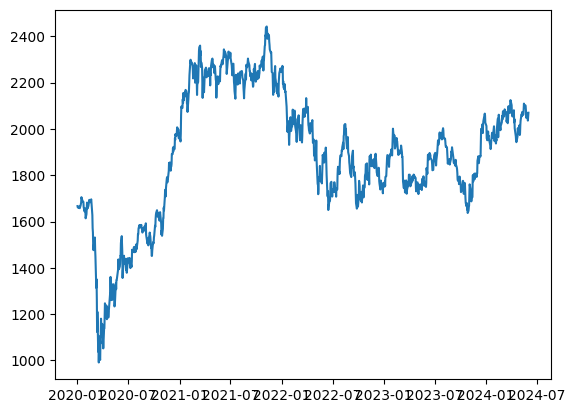

In [10]:
plt.plot(df['Close'])

<Axes: xlabel='Date'>

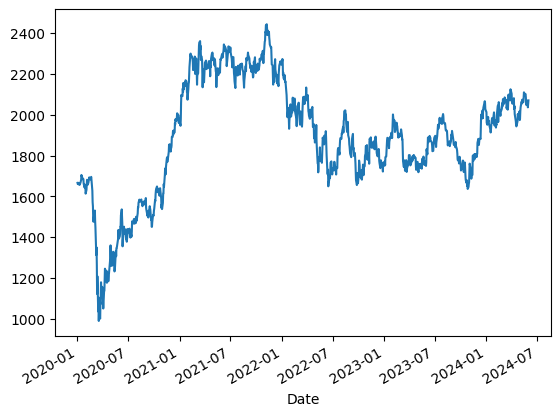

In [14]:
df['Close'].plot()

<Axes: xlabel='Date'>

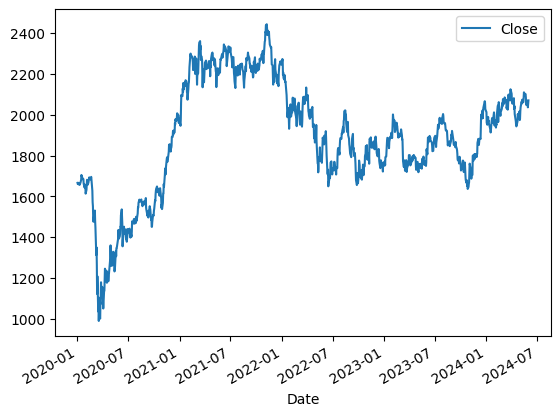

In [12]:
df[['Close']].plot()

In [13]:
df[['Close']]

,Close
Date,
2020-01-02,1666.770020
2020-01-03,1660.869995
2020-01-06,1663.260010
2020-01-07,1658.310059
2020-01-08,1663.589966
...,...
2024-05-24,2069.669922
2024-05-28,2066.850098
2024-05-29,2036.189941


In [15]:
df = df[['Close']]
df

,Close
Date,
2020-01-02,1666.770020
2020-01-03,1660.869995
2020-01-06,1663.260010
2020-01-07,1658.310059
2020-01-08,1663.589966
...,...
2024-05-24,2069.669922
2024-05-28,2066.850098
2024-05-29,2036.189941


In [16]:
df= df.apply(lambda x: x/x.iloc[0])
df

,Close
Date,
2020-01-02,1.000000
2020-01-03,0.996460
2020-01-06,0.997894
2020-01-07,0.994924
2020-01-08,0.998092
...,...
2024-05-24,1.241725
2024-05-28,1.240033
2024-05-29,1.221638


<Axes: xlabel='Date'>

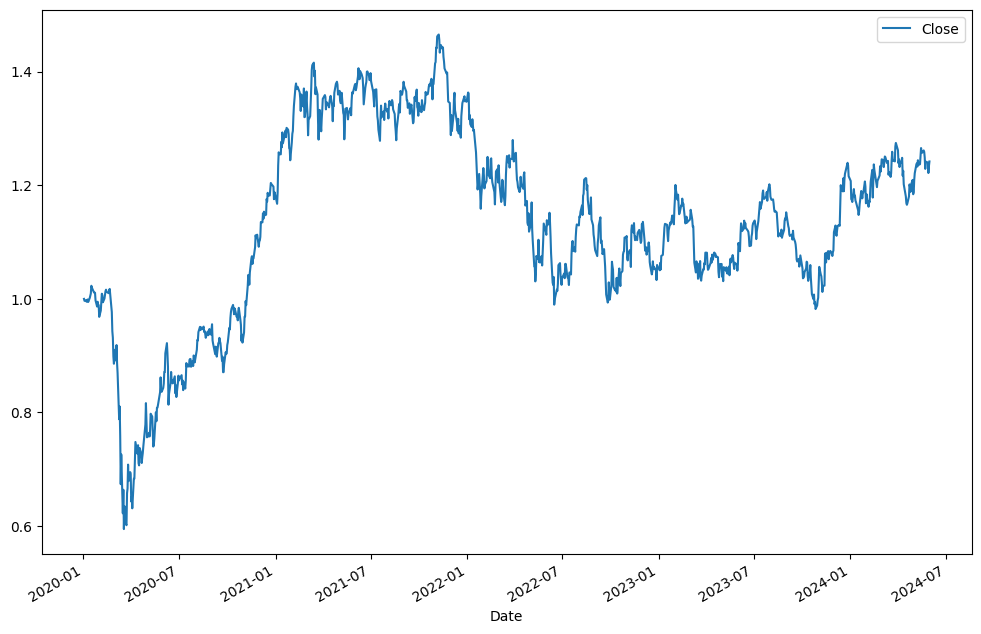

In [17]:
df.plot(figsize=(12, 8))